In [95]:
import numpy as np
import pandas as pd
import seaborn as sns


In [96]:
dataset = pd.read_csv("train.csv")
print(dataset.head())

         UID                ph_no    cvv  credit_card_number  \
0  T77962103           7059868985  673.0        2.131868e+14   
1  O92591533  +1-288-810-2425x013  983.0        4.820055e+15   
2  O31883571    791.502.4387x7276  855.0        4.031429e+15   
3  M18080565           2522308761  806.0        3.036423e+13   
4  Q74073854     683-521-2001x423  424.0        4.610207e+15   

                             job                      email  \
0                           Copy  guerrerodavid@example.org   
1  Interior and spatial designer     michaela47@example.org   
2       Scientist, water quality       zhoffman@example.org   
3                   Toxicologist         hprice@example.net   
4              Software engineer      michael61@example.net   

                         url                country  emoji             name  \
0         http://garcia.org/                  Gabon      📑     Cathy Cherry   
1          http://ortiz.com/                Bermuda     🥷🏿    Austin Graham   

In [97]:
print(dataset.shape)
print(dataset.isnull().sum())

(140000, 111)
UID                      0
ph_no                 1267
cvv                   1333
credit_card_number    1295
job                   1326
                      ... 
pZijn                 1311
WUc3c                 1312
sCIyG                 1260
qaERi                 1315
state                    0
Length: 111, dtype: int64


<Axes: >

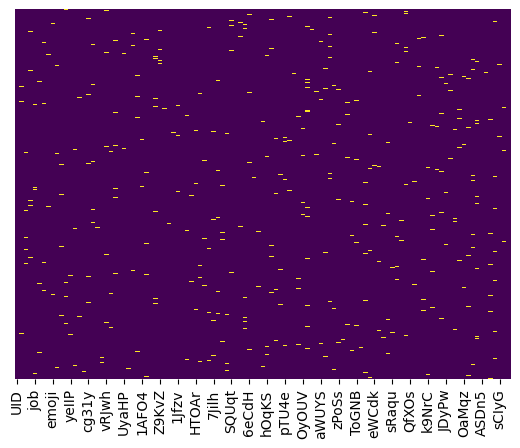

In [98]:
sns.heatmap(dataset.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [99]:
print(dataset.info)

<bound method DataFrame.info of               UID                ph_no     cvv  credit_card_number  \
0       T77962103           7059868985   673.0        2.131868e+14   
1       O92591533  +1-288-810-2425x013   983.0        4.820055e+15   
2       O31883571    791.502.4387x7276   855.0        4.031429e+15   
3       M18080565           2522308761   806.0        3.036423e+13   
4       Q74073854     683-521-2001x423   424.0        4.610207e+15   
...           ...                  ...     ...                 ...   
139995  363253815    (308)956-9340x849   246.0        4.224368e+15   
139996  501612410     250.952.6242x324  5704.0        3.595100e+15   
139997  C50473932         217.970.6851   197.0        2.563124e+15   
139998  S27033224         747-866-0589   621.0        4.223086e+15   
139999  Z76517010         728-556-3128   538.0        3.021959e+13   

                                   job                        email  \
0                                 Copy    guerrerodavid@

In [100]:
dataset = dataset.drop(["UID","ph_no","cvv","credit_card_number","email","url","emoji","name"],axis =1)

In [101]:
print(dataset.head())

                             job                country  \
0                           Copy                  Gabon   
1  Interior and spatial designer                Bermuda   
2       Scientist, water quality  Sao Tome and Principe   
3                   Toxicologist                  Korea   
4              Software engineer     Russian Federation   

                             K3Ll9                            19rjS  \
0  nwZga^-2.1507574515761925^tw❇CQ   k🍣E‍♀|-47.00024644698884|‍👩h‍J   
1   nwZga^1.1902903499515378^tw❇CQ   k🍣E‍♀|-6.230499784422298|‍👩h‍J   
2    nwZga^4.560736623294366^tw❇CQ   k🍣E‍♀|21.534617187553113|‍👩h‍J   
3   nwZga^-6.065571148914812^tw❇CQ   k🍣E‍♀|10.830220772220958|‍👩h‍J   
4   nwZga^-6.973737110860758^tw❇CQ  k🍣E‍♀|-12.733164273109868|‍👩h‍J   

                             yeIIP                            Bw1V5  \
0    9Gp🤷🏾%7.191215845738376%lThlH   7🦐🎨w9#12.185065384245283#🤷🏿Fb2   
1  9Gp🤷🏾%-17.179968255741546%lThlH   7🦐🎨w9#23.406359301376426#🤷🏿Fb2   
2   9

In [102]:
def clean_columns(dataset):
    for column in dataset.columns[2:-1]:
        dataset[column] = dataset[column].str.extract(r'(\-?\d+\.\d+)').astype(float)


In [103]:
clean_columns(dataset)

In [104]:
def correlation(dataset, threshold):
  col_cor = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_cor.add(colname)
  return col_cor

In [105]:
corr_features = correlation(dataset.drop(['state','job','country'], axis = 1), 0.7)

In [106]:
dataset = dataset.drop(corr_features,axis = 1)

In [107]:
for column in dataset.columns[2:-1]:
    column_mean = dataset[column].mean()
    dataset[column].fillna(column_mean, inplace=True)

In [108]:
dataset['job'].fillna(dataset['job'].mode()[0], inplace=True)
dataset['country'].fillna(dataset['country'].mode()[0], inplace=True)

In [109]:
print(dataset.isnull().sum())

job        0
country    0
K3Ll9      0
19rjS      0
yeIIP      0
          ..
ASDn5      0
vF2is      0
sCIyG      0
qaERi      0
state      0
Length: 95, dtype: int64


<Axes: >

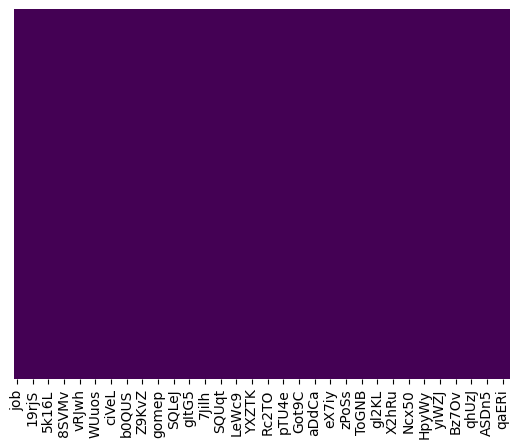

In [110]:
sns.heatmap(dataset.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [111]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [112]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,2:] = sc.fit_transform(x_train[:,2:])
x_test[:,2:] = sc.transform(x_test[:,2:])

In [114]:
from catboost import CatBoostClassifier
categorical_columns = list(range(2))

classifier = CatBoostClassifier(
    cat_features=categorical_columns,
)

classifier.fit(x_train, y_train)

Learning rate set to 0.100655
0:	learn: 2.2777710	total: 1.58s	remaining: 26m 20s
1:	learn: 2.2545252	total: 3.65s	remaining: 30m 21s
2:	learn: 2.2337037	total: 5.22s	remaining: 28m 56s
3:	learn: 2.2148184	total: 6.99s	remaining: 29m
4:	learn: 2.1937313	total: 8.61s	remaining: 28m 32s
5:	learn: 2.1766221	total: 10.2s	remaining: 28m 2s
6:	learn: 2.1597511	total: 11.8s	remaining: 27m 50s
7:	learn: 2.1414144	total: 13.5s	remaining: 27m 50s
8:	learn: 2.1258929	total: 15.1s	remaining: 27m 39s
9:	learn: 2.1086719	total: 16.7s	remaining: 27m 35s
10:	learn: 2.0918685	total: 18.3s	remaining: 27m 27s
11:	learn: 2.0773786	total: 19.9s	remaining: 27m 20s
12:	learn: 2.0621860	total: 21.5s	remaining: 27m 15s
13:	learn: 2.0473639	total: 23.2s	remaining: 27m 11s
14:	learn: 2.0333026	total: 24.8s	remaining: 27m 5s
15:	learn: 2.0194206	total: 26.4s	remaining: 27m 3s
16:	learn: 2.0044394	total: 28s	remaining: 26m 58s
17:	learn: 1.9917457	total: 29.6s	remaining: 26m 55s
18:	learn: 1.9795844	total: 31.2s	r

In [115]:
y_pred = classifier.predict(x_test)

In [116]:
from sklearn.metrics import accuracy_score,confusion_matrix

acc = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [117]:
print(cm)
print(acc)

[[2500   34   25   36   37   29   39   29   47   32]
 [  47 2444   25   24   25   28   33   33   36   53]
 [  41   35 2425   61   53   45   26   32   25   41]
 [  45   28   45 2415   29   39   48   44   39   36]
 [  40   31   29   34 2581   45   40   31   24   26]
 [  30   30   33   31   43 2486   25   45   23   45]
 [  49   43   40   34   21   35 2514   33   41   31]
 [  43   40   32   42   28   34   44 2400   28   36]
 [  37   54   28   34   33   37   32   33 2463   31]
 [  52   30   34   35   28   67   24   27   33 2540]]
0.8845714285714286


In [118]:
import joblib

model = classifier

joblib.dump(model, 'MIC_Catboost.pkl')



['MIC_Catboost.pkl']

In [146]:
test_dataset = pd.read_csv("test.csv")
print(test_dataset.head())

         UID                  ph_no     cvv  credit_card_number  \
0  675919160  001-869-364-3240x1461   632.0        4.787566e+12   
1  V09461652    +1-573-696-9623x435   548.0        4.804074e+15   
2  S75396644   001-755-901-1494x000   808.0        4.890170e+15   
3  598599835      (625)805-7487x931  9468.0        5.428366e+15   
4  W60397022     556-206-9662x97397   647.0        2.131239e+14   

                                     job                         email  \
0            Scientist, research (maths)  lawrencereginald@example.org   
1       Higher education careers adviser        jennifer41@example.org   
2                            Illustrator      valdezsheryl@example.net   
3                 Audiological scientist                           NaN   
4  Development worker, international aid    jefferyrussell@example.org   

                    url                           country  emoji  \
0    http://walker.org/                          Honduras  🧜🏻‍♀️   
1      http://sh

In [147]:
test_dataset = test_dataset.drop(["UID","ph_no","cvv","credit_card_number","email","url","emoji","name"],axis =1)

In [148]:
def clean_columns_new(dataset):
    for column in dataset.columns[2:]:
        dataset[column] = dataset[column].str.extract(r'(\-?\d+\.\d+)').astype(float)

In [149]:
clean_columns_new(test_dataset)

In [150]:
print(test_dataset.shape)

(60000, 102)


In [151]:
test_dataset = test_dataset.drop(corr_features,axis = 1)

In [152]:
for column in test_dataset.columns[2:]:
    column_mean = test_dataset[column].mean()
    test_dataset[column].fillna(column_mean, inplace=True)

In [153]:
test_dataset['job'].fillna(test_dataset['job'].mode()[0], inplace=True)
test_dataset['country'].fillna(test_dataset['country'].mode()[0], inplace=True)

In [154]:
data_types = test_dataset.dtypes
print(data_types)

job         object
country     object
K3Ll9      float64
19rjS      float64
yeIIP      float64
            ...   
zEnW3      float64
ASDn5      float64
vF2is      float64
sCIyG      float64
qaERi      float64
Length: 94, dtype: object


In [155]:
print(dataset.shape)
print(test_dataset.shape)

(140000, 95)
(60000, 94)


In [156]:
x_test_new = test_dataset.iloc[:,0:].values


In [157]:
x_test_new[:,2:] = sc.transform(x_test_new[:,2:])

In [158]:
y_test_pred = classifier.predict(x_test_new)


In [165]:
submission_dataset = pd.read_csv("test.csv")


UID                    object
ph_no                  object
cvv                   float64
credit_card_number    float64
job                    object
                       ...   
vF2is                  object
pZijn                  object
WUc3c                  object
sCIyG                  object
qaERi                  object
Length: 110, dtype: object


In [174]:
final_predictions = np.array(y_test_pred).flatten()

In [175]:
result_df = pd.DataFrame({'UID': submission_dataset['UID'], 'state': final_predictions})


result_df.to_csv('MIC_submission.csv', index=False)

In [176]:
importance_scores = classifier.feature_importances_
print(importance_scores)

[0.00554203 0.00343977 1.16762062 0.57548944 0.83736715 0.71217188
 1.55086802 0.89066676 0.98334108 1.14661934 1.48416089 1.05654892
 1.81789036 1.58768467 1.84213684 0.12012805 1.30637433 1.40978883
 1.52580644 1.05165138 0.80635252 1.25122114 1.02302792 1.76672783
 1.37618659 1.08755324 0.07567961 0.71632864 0.70520112 0.85360194
 0.46505655 1.73048144 0.84199358 0.94464125 0.77788631 1.26310166
 1.25534192 0.80597601 0.72920707 1.58042145 1.36887687 1.65015328
 1.32724361 0.66998866 0.95648443 1.81621869 1.62383701 0.84986863
 0.12368014 1.1408613  1.56929735 1.22263171 0.61637812 1.54055962
 0.85881671 1.50238555 1.40272482 1.50812265 0.02946116 0.55404569
 1.33743224 1.37348169 1.51987906 1.24140764 1.58305794 0.95445567
 0.60937377 1.78213804 1.31759413 1.51523457 1.58947532 1.74575988
 1.22229248 0.84475065 1.47913412 1.39352175 0.88254803 0.76682597
 0.06183883 1.40286687 0.16841546 0.67441572 0.06081542 1.04840593
 0.00977107 0.59377729 0.97228647 0.50414392 1.26269095 1.4980